In [52]:
# importing libraris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [53]:
# Load the cleaned dataset
df = pd.read_csv('Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [55]:
print(df.duplicated().sum())

0


In [56]:
# Assuming you've loaded the dataset into a dataframe named df

# Select relevant spending columns (numeric features) for clustering
x = df[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]]


In [57]:
# Scale features (important for KMeans)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [58]:
from sklearn.cluster import KMeans
# Initialize KMeans with 5 clusters, k-means++ init and fixed random state
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)


In [59]:
# Fit and predict clusters
y_kmeans = kmeans.fit_predict(x_scaled)


In [60]:
# Add the cluster labels back to the dataframe if you want
df['Cluster'] = y_kmeans
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        3  
1        1776        0  
2        7844        0  
3        1788        3  
4        5185        1  


In [61]:
# Convert cluster labels to a DataFrame first, with a column name
clusters = pd.DataFrame(y_kmeans, columns=['Cluster'])


In [62]:
# Concatenate features and cluster labels side-by-side
data = pd.concat([x.reset_index(drop=True), clusters], axis=1)

print(data.head())


   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Cluster
0  12669  9656     7561     214              2674        1338        3
1   7057  9810     9568    1762              3293        1776        0
2   6353  8808     7684    2405              3516        7844        0
3  13265  1196     4221    6404               507        1788        3
4  22615  5410     7198    3915              1777        5185        1


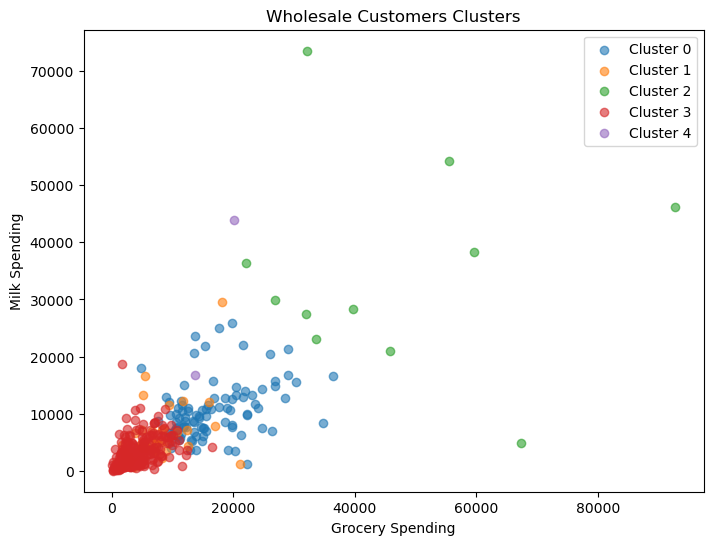

In [63]:
# Plot Grocery vs Milk, color-coded by cluster
plt.figure(figsize=(8,6))
for cluster in range(5):
    clustered_data = df[df['Cluster'] == cluster]
    plt.scatter(
        clustered_data['Grocery'], 
        clustered_data['Milk'], 
        label=f'Cluster {cluster}', 
        alpha=0.6
    )

plt.xlabel('Grocery Spending')
plt.ylabel('Milk Spending')
plt.title('Wholesale Customers Clusters')
plt.legend()
plt.show()

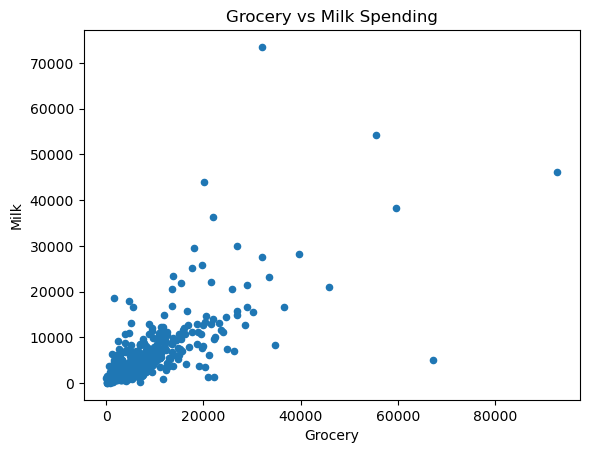

In [64]:
import matplotlib.pyplot as plt

# Example: plotting Grocery vs Milk spending
x.plot(kind='scatter', x='Grocery', y='Milk')
plt.title('Grocery vs Milk Spending')
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.show()


In [65]:

# if I want to predict for my input
kmeans.predict([[30,70,20, 10, 15, 5]])

array([2])

<Axes: title={'center': 'Cluster 2: Grocery vs Milk Spending'}, xlabel='Grocery', ylabel='Milk'>

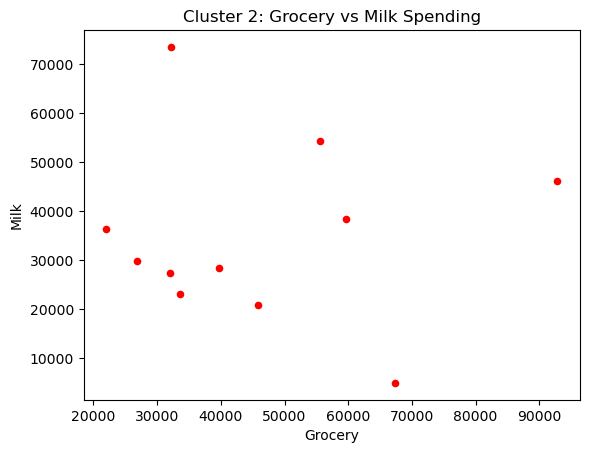

In [66]:
data[data['Cluster'] == 2].plot(
    kind='scatter', 
    x='Grocery', 
    y='Milk', 
    color='red',
    title='Cluster 2: Grocery vs Milk Spending'
)


In [67]:
import numpy as np

print("Enter new customer data to predict cluster:")

fresh = float(input("Enter Fresh spending: "))
milk = float(input("Enter Milk spending: "))
grocery = float(input("Enter Grocery spending: "))
frozen = float(input("Enter Frozen spending: "))
detergents = float(input("Enter Detergents_Paper spending: "))
delicassen = float(input("Enter Delicassen spending: "))

# Create full input array
new_customer = np.array([[fresh, milk, grocery, frozen, detergents, delicassen]])

# Scale using the same scaler
new_customer_scaled = scaler.transform(new_customer)

# Predict cluster
predicted_cluster = kmeans.predict(new_customer_scaled)[0]

print(f"The customer belongs to cluster {predicted_cluster}")


Enter new customer data to predict cluster:


Enter Fresh spending:  8648
Enter Milk spending:  4842
Enter Grocery spending:  4686
Enter Frozen spending:  754
Enter Detergents_Paper spending:  3794
Enter Delicassen spending:  4794


The customer belongs to cluster 3


In [68]:
#12669 9656 7561 2142674   1338

In [71]:
with open('kmeans_model.pkl', 'wb') as file:
    pkl.dump(kmeans, file)  

In [73]:
# Save the fitted scaler
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
